In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [45]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


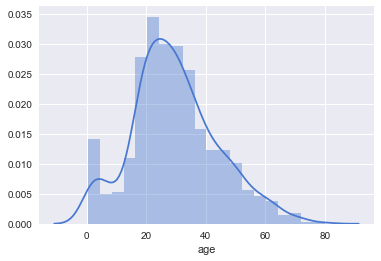

In [46]:
sns.set(style="darkgrid", palette="muted", color_codes=True)    
sns.distplot(titanic[titanic['age'].notnull()]['age'])

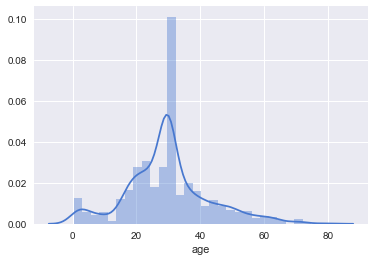

In [47]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
sns.distplot(titanic['age'])

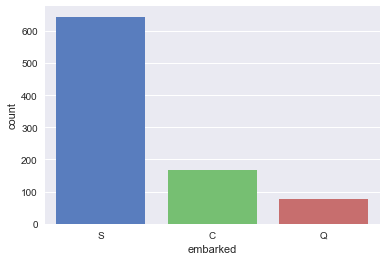

In [48]:
sns.countplot(x="embarked",data=titanic)

In [50]:
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [51]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [52]:
titanic = titanic.drop(['survived','pclass','sibsp','parch','who','adult_male','deck','embark_town'],axis=1)
titanic.head()

,sex,age,fare,embarked,class,alive,alone
0,male,22.0,7.2500,S,Third,no,False
1,female,38.0,71.2833,C,First,yes,False
2,female,26.0,7.9250,S,Third,yes,True
3,female,35.0,53.1000,S,First,yes,False
4,male,35.0,8.0500,S,Third,no,True


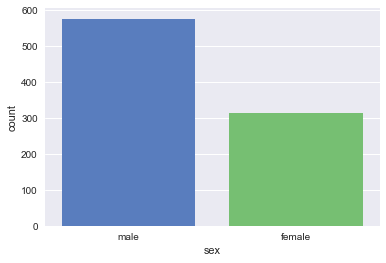

In [53]:
sns.countplot(x="sex",data=titanic)

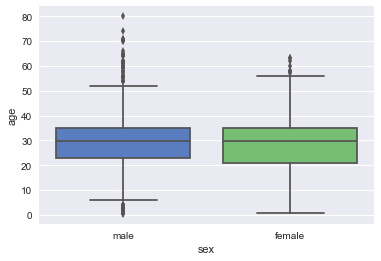

In [54]:
sns.boxplot(x='sex',y='age',data=titanic)

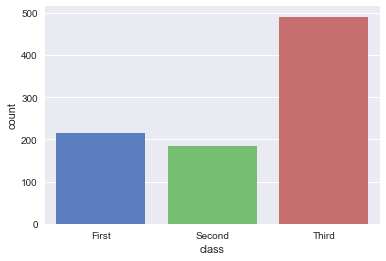

In [55]:
sns.countplot(x="class",data=titanic)

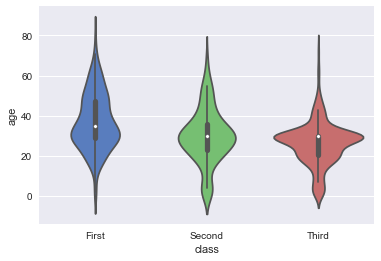

In [56]:
sns.violinplot(x="class", y="age", data=titanic)

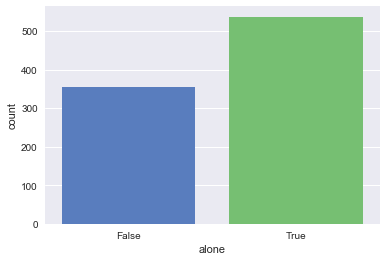

In [57]:
sns.countplot(x="alone",data=titanic)

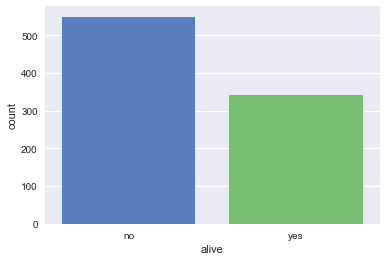

In [58]:
sns.countplot(x="alive",data=titanic)

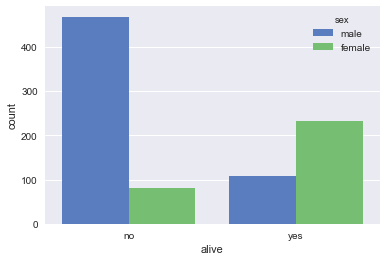

In [59]:
sns.countplot(x='alive',hue='sex',data=titanic)

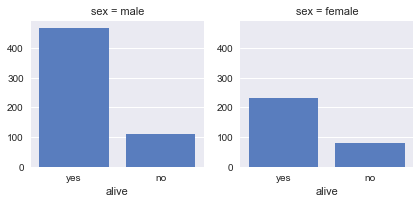

In [60]:
g = sns.FacetGrid(titanic, col='sex')
g.map(sns.countplot, 'alive')

In [61]:
def agelevel(age):    
    if age <= 16:
        return 'child'
    elif age >= 60:
        return 'aged'
    else:
        return 'midlife'
    
titanic['age_level'] = titanic['age'].map(agelevel)

In [62]:
titanic.head()

,sex,age,fare,embarked,class,alive,alone,age_level
0,male,22.0,7.2500,S,Third,no,False,midlife
1,female,38.0,71.2833,C,First,yes,False,midlife
2,female,26.0,7.9250,S,Third,yes,True,midlife
3,female,35.0,53.1000,S,First,yes,False,midlife
4,male,35.0,8.0500,S,Third,no,True,midlife


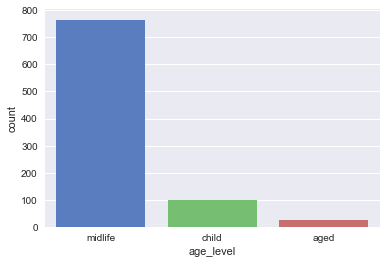

In [63]:
sns.countplot(x='age_level',data=titanic)

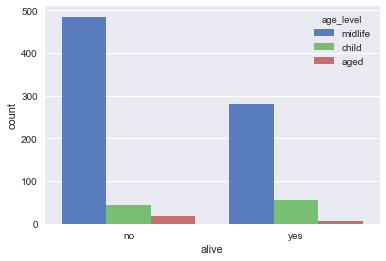

In [64]:
sns.countplot(x='alive',hue='age_level',data=titanic)

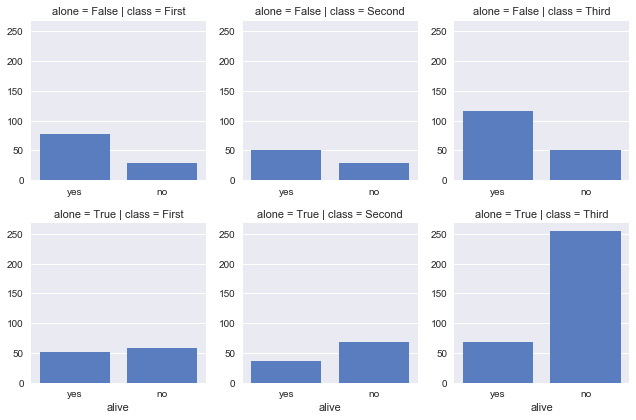

In [65]:
g = sns.FacetGrid(titanic, col='class', row='alone')
g.map(sns.countplot, 'alive')